Title

Description

Importing packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing data into pandas DataFrame.

In [2]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

,fire_size_class,latitude,longitude,discovery_month,weekday,Vegetation,remoteness,elevation,Temp,Wind,Humidity,Precipitation
29533,D,37.034444,-83.468056,Sep,False,NaN,0.145839,503.0,22.279011,1.749785,61.922705,21.166667
31554,B,45.441111,-93.750000,Apr,True,Grassland,0.236224,296.0,7.733612,3.621442,63.573397,0.000000
13334,B,33.492650,-88.093230,Mar,True,Broadleaf Forest,0.189754,109.0,10.097468,3.621008,55.280689,0.000000
31248,B,34.226700,-80.691100,Mar,True,Broadleaf Forest,0.122826,84.0,15.422120,3.613102,57.192751,0.000000
17257,B,32.972500,-83.403600,Aug,True,Shrubland,0.147795,132.0,26.574855,2.176120,74.708121,72.433333


Separate target variable (fire_size_class) from predictor variables.

In [3]:
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

Changing categorical variables into one-hot encoded ones.

In [4]:
# First let's do fire_size_class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
dfTarget.sample(5)

,B,C,D,E,F,G
25507,1,0,0,0,0,0
14285,1,0,0,0,0,0
27938,1,0,0,0,0,0
6264,0,1,0,0,0,0
34617,0,0,0,0,0,1


In [5]:
# Now Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# And discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)

# And weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)
dfPredictor.sample(5)

,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
9921,39.811410,-94.252810,0.242921,298.0,-1.926829,1.468769,21.442424,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
14027,33.793758,-117.254336,0.469882,531.0,2.744305,0.433333,16.207108,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
12081,43.833333,-97.975000,0.276299,386.0,13.373291,4.036380,64.338268,5.3,0,0,...,0,0,0,0,0,0,1,0,0,1
16247,35.569200,-113.384700,0.429850,1522.0,27.292155,5.244370,22.766203,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
34817,39.562800,-108.428300,0.157791,1923.0,21.899968,2.876660,28.957149,1.7,0,0,...,0,1,0,0,0,0,0,0,0,1


Scaling numerical data to 0-1 range.

In [6]:
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
# dfPredictorScaled.sample(5)

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)

,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
2725,0.280757,0.800182,0.165643,0.057049,0.632186,0.121574,0.679149,0.002900,0,0,...,0,0,0,0,1,0,0,0,0,1
7854,0.315007,0.553825,0.396227,0.619857,0.631569,0.190013,0.412385,0.002936,1,0,...,0,0,0,0,0,0,0,0,0,1
5795,0.485557,0.873235,0.095350,0.146736,0.363661,0.134670,0.719244,0.005300,0,0,...,0,0,0,0,0,1,0,0,0,1
29634,0.481938,0.799774,0.160472,0.099013,0.435790,0.159395,0.634692,0.004249,0,0,...,0,0,0,0,0,0,0,0,0,1
165,0.360947,0.853678,0.115441,0.070488,0.320908,0.063497,0.717311,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,1


Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42)

Training models, each in a cell (?)

* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

KNN

Trained in in 164.1297 seconds


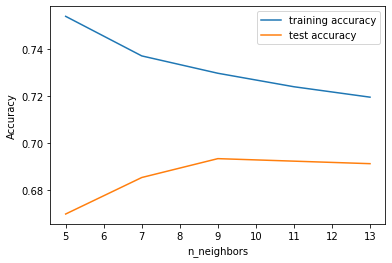

In [33]:
from sklearn.neighbors import KNeighborsClassifier
import time  # optional for timing the code

training_accuracy = []
test_accuracy = []
nNeighbors = range(5, 15, 2)

tic = time.perf_counter()  # timing start
for nNeighbor in nNeighbors:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=nNeighbor, n_jobs=-1)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(nNeighbors, training_accuracy, label="training accuracy")
plt.plot(nNeighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

9 seems to be the best on our test set. Let's train that model and save it.

In [34]:
clf = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
clf.fit(X_train, y_train)

training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(f"Number of neighbors: {9} \nTraining accuracy: {training_accuracy} \nTest accuracy: {test_accuracy}")

Number of neighbors: 9 
Training accuracy: 0.7298490543523656 
Test accuracy: 0.6934228187919463


Naive Bayes

In [13]:
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

# train a Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)
multi_bnb = MultiOutputClassifier(bnb, n_jobs=-1)
multi_bnb.fit(X_train,y_train)
print(f"BernoulliNB score: {multi_bnb.score(X_test, y_test)}")


# train a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
multi_gnb = MultiOutputClassifier(gnb, n_jobs=-1)
multi_gnb.fit(X_train, y_train)
print(f"GaussianNB score: {multi_gnb.score(X_test, y_test)}")

# train a Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
multi_mnb = MultiOutputClassifier(mnb, n_jobs=-1)
multi_mnb.fit(X_train,y_train)
print(f"MultinomialNB score: {multi_mnb.score(X_test, y_test)}")





BernoulliNB score: 0.5884563758389262
GaussianNB score: 0.21986577181208053
MultinomialNB score: 0.5978523489932885
